<a href="https://colab.research.google.com/github/LinarKulinar/ml-for-sec-lab2/blob/main/Get_feature_from_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random
from random import random, randrange, randint

from operator import itemgetter

import os, sys
import pandas as pd


In [2]:
# dir_name = 'BOWS2/'
dir_name = 'BOWS2/'
pictures = os.listdir(dir_name)
count_pictures = len(pictures)

imgs_raw = []
for k in range(count_pictures):
    im = cv2.imread(f'{dir_name}{pictures[k]}', 0)
    print(im.shape)
    imgs_raw.append(im)

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)

In [3]:
imgs = np.array(imgs_raw)

## Реализуем НЗБ встраивание

Реализуем непосредственную замену битовой плоскости изображения встроенной информацией

Нижеприведенная формула описывает это кодирование:

$ C_{p}^{W}(n_{1},n_{2}) = W(n_{1},n_{2}) $

Где $p$  - индекс битовой плоскости,

$W$ - значение интенсивности встраемого пикселя,

$C_{p}^{W}$ - итоговое значение интенсивности пикселя (но только не всё число, а в битовой плоскости $p$), со встроенными данными,

$(n_{1},n_{2})$ - два индекса пикселя на картинке

In [4]:
def encode_pix_with_replacing(pix: int, pix_secret: int, bitmap_number: int, debug_logs: bool = False):
    """
    Данный метод реализовывает НЗБ-встраивание заменой битовой плоскости.
    Keyword arguments:
    pix -- Пиксель изображения, в который встраивем код в НЗБ. Подразумевается, что переменная pix целочисленная и лежит в диапазоне [0, 255].
    pix_secret -- Пиксель изображения, который будем встраивать. Он должен быть целочисленным и лежать в диапазоне [0, 1].
    bitmap_number -- Номер битовой плоскости, в которую встраивается информация из pix_secret (отсчёт плоскостей начинается справа). Целое число в диапазоне [0, 7]
    """
    assert str(pix).isdigit(), "в pix может хранится только целое число"
    assert str(pix_secret).isdigit(), "в pix может хранится только целое число"
    assert str(bitmap_number).isdigit(), "в pix может хранится только целое число"
    assert isinstance(debug_logs, bool)

    pix = int(pix)
    pix_secret = int(pix_secret)
    bitmap_number = int(bitmap_number)

    assert (pix_secret == 0) | (pix_secret == 1), "в pix_secret может хранится только целое число 0 или 1"
    assert (pix >=0) & (pix <= 255), "в pix может хранится только целое число в диапазоне [0, 255]"
    assert (bitmap_number >=0) & (bitmap_number <= 7), "в bitmap_number может хранится только целое число в диапазоне [0, 7]"

    if debug_logs:
        print("pix =", pix, "=", bin(pix), "- Это исходное восьмибитное число")

    # строим битмаску
    bitmask1 = 1 << bitmap_number # ставим единицу в разряд bitmap_number в битовом представлении числа с помощью операции побитового сдвига
    if debug_logs:
        print("bitmask1 =", bitmask1, "=", bin(bitmask1), "- Это число, у которого в разряде bitmap_number =", bitmap_number, "стоит единица, а в остальных разрядах ноль")

    bitmask_inverse = 255 - (bitmask1) # инвертируем bitmask1
    if debug_logs:
        print("bitmask_inverse =", bitmask_inverse, "=", bin(bitmask_inverse), "- Это число, у которого в разряде bitmap_number =", bitmap_number, "стоит ноль, а в остальных разрядах единица")

    # обнуляем бит под номером bitmap_number с помощью битмаски
    pix_with_zeros_nzb = pix & bitmask_inverse
    if debug_logs:
        print("pix_with_zeros_nzb =", pix_with_zeros_nzb, "=", bin(pix_with_zeros_nzb), "- Это число pix, у которого в разряде bitmap_number =", bitmap_number, "установили ноль")

    # Вот в формуле снизу разница всех модификаций, которая нужна в задании

    bitmask_with_pix_secret = pix_secret << bitmap_number # ставим pix_secret в разряд bitmap_number в битовом представлении числа с помощью операции побитового сдвига
    if debug_logs:
        print("bitmask_with_pix_secret =", bitmask_with_pix_secret, "=", bin(bitmask_with_pix_secret), "- Это число, у которого в разряде bitmap_number =", bitmap_number, "стоит значение pix_secret =", pix_secret, ", а в остальных разрядах ноль")
    pix_with_encoded_secret = pix_with_zeros_nzb | bitmask_with_pix_secret
    if debug_logs:
        print("pix_with_encoded_secret =", pix_with_encoded_secret, "=", bin(pix_with_encoded_secret), "- Это число pix =", pix, ", у которого в разряде bitmap_number =", bitmap_number, "стоит значение pix_secret =", pix_secret, ", а в остальных разрядах ноль")
    return pix_with_encoded_secret

encode_pix_with_replacing(29, 1, 1, debug_logs=True)

pix = 29 = 0b11101 - Это исходное восьмибитное число
bitmask1 = 2 = 0b10 - Это число, у которого в разряде bitmap_number = 1 стоит единица, а в остальных разрядах ноль
bitmask_inverse = 253 = 0b11111101 - Это число, у которого в разряде bitmap_number = 1 стоит ноль, а в остальных разрядах единица
pix_with_zeros_nzb = 29 = 0b11101 - Это число pix, у которого в разряде bitmap_number = 1 установили ноль
bitmask_with_pix_secret = 2 = 0b10 - Это число, у которого в разряде bitmap_number = 1 стоит значение pix_secret = 1 , а в остальных разрядах ноль
pix_with_encoded_secret = 31 = 0b11111 - Это число pix = 29 , у которого в разряде bitmap_number = 1 стоит значение pix_secret = 1 , а в остальных разрядах ноль


31

In [5]:
encode_pix_with_replacing(27, 1, 1)

27

In [6]:
# Векторизируем функцию для того чтобы могли поэлементно к матрице применять
vec_func_encode_pix_with_replacing = np.vectorize(encode_pix_with_replacing)

In [7]:
data = imgs[0]
data_secret_binary = np.random.randint(0, high=2, size=imgs[0].shape, dtype=int)

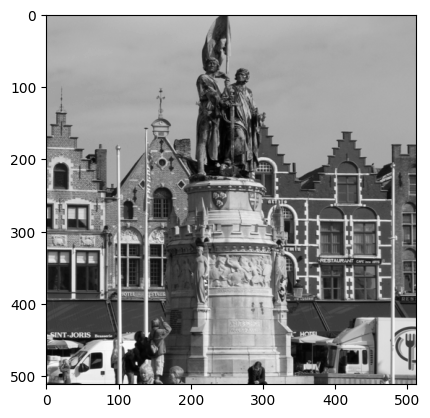

In [8]:
plt.imshow(data, cmap='gray')
plt.show()

Data shape: (512, 512)
Data type: <class 'numpy.ndarray'>


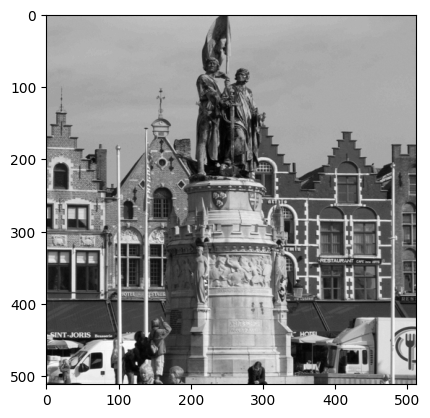

In [9]:
bitmap_number = 1

data_with_with_encoded_secret_1_method = vec_func_encode_pix_with_replacing(data, data_secret_binary, bitmap_number) 
print('Data shape:',data_with_with_encoded_secret_1_method.shape)
print('Data type:',type(data_with_with_encoded_secret_1_method))
plt.imshow(data_with_with_encoded_secret_1_method, cmap='gray')
plt.show()

### Генерируем матрицу с белым шумом и вставляем в вторую битовую плоскость

In [10]:
imgs.shape

(1000, 512, 512)

In [11]:
imgs[0:5,:,:].shape

(5, 512, 512)

In [ ]:
bitmap_number = 1  # Вторая битовая плоскость
imgs_raw_with_encoded_secret = []

for img in imgs:
# for img in imgs[0:5,:,:]:
    img_secret_binary = np.random.randint(0, high=2, size=img.shape, dtype=int)

    data_with_with_encoded_secret_1_method = vec_func_encode_pix_with_replacing(img, img_secret_binary, bitmap_number) 
    #print('Data shape:',data_with_with_encoded_secret_1_method.shape)
    #print('Data type:',type(data_with_with_encoded_secret_1_method))
    imgs_with_encoded_secret = data_with_with_encoded_secret_1_method
    imgs_raw_with_encoded_secret.append(imgs_with_encoded_secret)

imgs_with_encoded_secret = np.array(imgs_raw_with_encoded_secret)

In [ ]:
plt.imshow(imgs_with_encoded_secret[0], cmap='gray')
plt.show()